## Расчет КПД термодинамического цикла

In [13]:
import test as wsp
import matplotlib.pyplot as pl
import numpy as np
from coursache import tex_exp, print_latex

# P_f = 1088538.1638538  # 11.1 кгс/см² https://fis.bobrodobro.ru/8395
P_f = 980665.01248092  # 10 кгс/см² из https://ru.wikipedia.org/wiki/%D0%9A-1000-60/1500

# h
T_h = 220 + 273
# P_h = wsp.wspPST(T_h)
P_h = 5.9 * 10 ** 6
S_h = wsp.wspSSWT(T_h)
H_h = wsp.wspHSWT(T_h)

# b
P_b = P_h
T_b = wsp.wspTSP(P_b)
S_b = wsp.wspSSWT(T_b)
H_b = wsp.wspHSWT(T_b)

# c
P_c = P_b
T_c = T_b
S_c = wsp.wspSSST(T_c)
H_c = wsp.wspHSST(T_c)

# d
P_d = P_f
T_d = wsp.wspTSP(P_d)
S_d = S_c
H_d = wsp.wspHPS(P_d, S_d)
x_d = wsp.wspXPS(P_d, S_d)

# f
T_f = 250 + 273
S_f = wsp.wspSPT(P_f, T_f)
H_f = wsp.wspHPT(P_f, T_f)

# k
P_k = 4381 # 5883.9900748855 # конденсаторах типа К-22550. из https://leg.co.ua/arhiv/generaciya/ekspluatacionnye-rezhimy-vodo-vodyanyh-energeticheskih-reaktorov-33.html старое значение
x_k = x_d
T_k = wsp.wspTSP(P_k) - 2
S_k = S_f
H_k = wsp.wspHPS(P_k, S_k)


# e
T_e = T_d
P_e = P_d
S_e = wsp.wspSSST(T_e)
H_e = wsp.wspHSST(T_e)


# k'
P_k1 = P_k
T_k1 = T_k
S_k1 = wsp.wspSSWT(T_k1)
H_k1 = wsp.wspHSWT(T_k1)

# a
P_a = P_b
T_a = T_k
S_a = wsp.wspSPT(P_a, T_a)
H_a = wsp.wspHPS(P_a, S_a)

# g
T_g = T_d
P_g = P_d
S_g = wsp.wspSSWT(T_g)
H_g = wsp.wspHSWT(T_g)

n = 7
Q_el = 1000 * 10 ** 6 # Вт

import tabulate
from IPython.display import Latex, Math
display(tabulate.tabulate(
    {"Точка": ['h', 'b', 'c', 'd', 'e', 'f', 'k', 'k`', 'a', 'g'],
     "P":     np.array([P_h, P_b, P_c, P_d, P_e, P_f, P_k, P_k1, P_a, P_g]) * 10 ** -6,
     "T":     np.array([T_h, T_b, T_c, T_d, T_e, T_f, T_k, T_k1, T_a, T_g]) - 273,
     "S":     np.array([S_h, S_b, S_c, S_d, S_e, S_f, S_k, S_k1, S_a, S_g]),
     "H":     np.array([H_h, H_b, H_c, H_d, H_e, H_f, H_k, H_k1, H_a, H_g]) * 10 ** -3},
    tablefmt="html", headers="keys"))
Math(f"x_d = {tex_exp(x_d)}")

FileNotFoundError: Could not find module 'okawsp6.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [ ]:
wsp.wspTSP(P_k) - 2 - 273

In [ ]:
tex_table = fr"""
\begin{{table}}[H]
	\caption{{Значения параметров TS-диаграммы}}
	\begin{{center}}
        \begin{{tabular}}{{|c|c|c|c|c|}}
        \toprule
         Точка & P, МПа & T, $^\circ C$ & S, Дж/(кг $\cdot$ К) & h, кДж/кг \\ 
         \midrule
         \hline
          h & {P_h * 10 ** (-6):.01f} & {T_h -273} &  {S_h:.02f} & {H_h:.02f}\\ 
         \hline
          b & {P_b * 10 ** (-6):.01f} & {T_b - 273:.01f} & {S_b:.02f} & {H_b} \\ 
         \hline
          c & {P_c} & {T_c} & {S_c} & {H_c}\\ 
         \hline
          d & {P_d} & {T_d} & {S_d} & {H_d} \\ 
         \hline
          e & {P_e} & {T_e} & {S_e} & {H_e} \\ 
         \hline
          f & {P_f} & {T_f}  & {S_f} & {H_e} \\ 
         \hline
          k & {P_k} & {T_k} & {S_k} & {H_k} \\ 
         \hline
          k′ & {P_k1} & {T_k1} & {S_k1} & {H_k1} \\ 
         \hline
          a & {P_a} & {T_a} & {S_a} & {H_a} \\ 
         \hline
          g & {P_g} & {T_g} &  {S_g} & {H_g} \\ 
         \bottomrule
		\end{{tabular}}
		\label{{tabular:coeffs}}
	\end{{center}}
\end{{table}}
"""
Latex(tex_table)

In [ ]:
eta_t0 = 1 - ((T_k * (S_f - S_a) * x_d) / 
          # -------------------------------------------------
            ((H_c - H_g) + x_d * ((H_g - H_a) + (H_f - H_e))))

eta_t0_formulas = r"""
1 - 
\frac{T_{k} ⋅ \left( s_{f} - s_{a} \right) ⋅ x_{d}}
{\left( h_{c} - h_{g} \right) +x_{d}\left( \left( h_{g} - h_{a} \right) + \left( h_{f} - h_{e} \right) \right)}
"""

eta_t0_nums = fr"""
1 - 
\frac{{{tex_exp(T_k)} ⋅ \left( {tex_exp(S_f)} - {tex_exp(S_a)} \right) ⋅ {tex_exp(x_d)}}}
{{\left( {tex_exp(H_c)} - {tex_exp(H_g)} \right) + {tex_exp(x_d)} \left( \left( {tex_exp(H_g)} - {tex_exp(H_a)} \right) + \left( {tex_exp(H_f)} - {tex_exp(H_e)} \right) \right)}}
"""

final_code = fr"\begin{{align}} \eta_{{t0}}=&{eta_t0_formulas}=\\=&{eta_t0_nums}=\\=&{tex_exp(eta_t0)}\end{{align}}"

print(final_code)
display(Math(final_code))


In [ ]:
eta_t_infty = 1 - ((T_k * (S_f - S_g) * (S_c - S_h)) /
                # ------------------------------------------------------
                 ((H_c - H_h) * (S_e - S_g) + (H_f - H_e) * (S_c - S_h)))

eta_t_infty_formula = r"""
1 -
\frac{T_{k} ⋅ \left( s_{f} - s_{g} \right) \left( s_{c} - s_{h} \right)}
{\left(h_{c} - h_{h}\right) ⋅ \left( s_{e} - s_{g} \right) + \left( h_{f} - h_{e} \right) ⋅ \left( s_{c} - s_{h} \right)}
"""

eta_t_infty_nums = fr"""
1 -
\frac{{{tex_exp(T_k)} ⋅ \left( {tex_exp(S_f)} - {tex_exp(S_g)} \right) \left( {tex_exp(S_c)} - {tex_exp(S_h)} \right)}}
{{\left({tex_exp(H_c)}) - {tex_exp(H_h)}\right) ⋅ \left( {tex_exp(S_e)} - {tex_exp(S_g)} \right) + \left( {tex_exp(H_f)} - {tex_exp(H_e)} \right) ⋅ \left( {tex_exp(S_c)} - {tex_exp(S_h)} \right)}}
"""

final_code = fr"\begin{{align}}η_{{t∞}}&={eta_t_infty_formula}=\\&={eta_t_infty_nums}=\\&={tex_exp(eta_t_infty)}\end{{align}}"
print(final_code)

Math(final_code)

In [ ]:
eta_tn = eta_t0 + (eta_t_infty - eta_t0) * n / (n + 1)

eta_tn_formula = r"""
η_{tn} = η_{t0} + \left( η_{t∞} - η_{t0} \right) ⋅ \frac{n}{n+1}
"""

eta_tn_nums = fr"""
{tex_exp(eta_t0)} + \left( {tex_exp(eta_t_infty)} - {tex_exp(eta_t0)} \right) \cdot \frac{{{n}}}{{{n + 1}}}
"""

final_code = fr"{eta_tn_formula}={eta_tn_nums}={tex_exp(eta_tn)}"
print(final_code)

Math(final_code)

In [ ]:
eta_brutto = eta_tn * 0.85 * 0.98 * 0.98 * 0.97

eta_brutto_formula = r"""
\eta_{\text{брутто}} = \eta^7 \cdot \eta^{\text{вн}} \cdot \eta_{\text{ос}} \cdot \eta_{\text{эг}} \cdot \eta_{\text{мех}} = 0.335
"""

eta_brutto_nums = fr"{tex_exp(eta_tn)} \cdot 0.85 \cdot 0.98 \cdot 0.98 \cdot 0.97"
final_code=fr"{eta_brutto_formula}={eta_brutto_nums}={tex_exp(eta_brutto)}"
print(final_code)
Math(final_code)

In [ ]:
Q_tep = Q_el / eta_brutto

final_code = fr"Q_{{\text{{теп}}}} = \frac{{Q_{{\text{{эл}}}}}}{{\eta_{{\text{{брутто}}}}}}=\frac{{ {tex_exp(Q_el)} }} {{ {tex_exp(eta_brutto)} }} = {tex_exp(Q_tep * 10 ** -6)} \text{{МВт}}"
Q_tep

print(final_code)
Math(final_code)

In [ ]:
pl.plot([S_h, S_b, S_c, S_d, S_e, S_f, S_k, S_k1, S_a, S_g, S_h],
        np.array([T_h, T_b, T_c, T_d, T_e, T_f, T_k, T_k1, T_a, T_g, T_h]) - 273, '-o')
pl.grid()
pl.xlabel(r"$S, Дж/ (кг \cdot К)$")
pl.ylabel(r"$T,^\circ C$")
pl.savefig("TS_raw.svg")

## Расчет изменения теплового потока в наиболее нагруженном канале

In [ ]:
K_r = 1.25
K_z = 1.5
N_tvs = 163
N_tvel = 317
H_az = 3.5 
q_max = Q_tep  * K_r * K_z / ( N_tvs * N_tvel * H_az )
q_max * 10 ** 4

q_max_formula = r"""
q_{max} = \frac {Q_{\text{теп}}K_r K_z}{N_{\text{ТВС}}N_{\text{твэл}}H_{\text{аз}}}  
"""

q_max_nums = fr"""
\frac 
{{ {tex_exp(Q_tep)} \cdot {K_r} \cdot {K_z}  }}
{{ {N_tvs} \cdot {N_tvel} \cdot {H_az} }}
"""

final_code = fr"{q_max_formula}={q_max_nums}={tex_exp(q_max / 100) } \frac {{\text{{Вт}}}} {{\text{{см}}}}"
print(final_code)
Math(final_code)

## Распределение температуры теплоносителя по высоте 

In [ ]:
P_az = 15.7 * 10 ** 6
T_az_vh = 287 + 273
T_az_vih = 320 + 273
H_vh = wsp.wspHPT(P_az, T_az_vh)
H_vih = wsp.wspHPT(P_az, T_az_vih)


G_tvs = (
            Q_tep           /
  # --------------------------
    ( (H_vih - H_vh) * N_tvs )
)

G_tvs_formula = r"""
G_{\text{ТВС}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})N_{\text{ТВС}}}
"""

G_tvs_nums = fr"""
\frac {{ {tex_exp(Q_tep)} }} {{ ( { tex_exp(H_vih) } - { tex_exp(H_vh) }) \cdot {N_tvs} }} = {tex_exp(G_tvs)} \ \frac {{\text{{кг}}}}{{\text{{c}}}}
"""

final_code = f"{G_tvs_formula}={G_tvs_nums}"

print(final_code)
Math(final_code)


In [ ]:
G_reak = (
            Q_tep           /
  # --------------------------
    ( (H_vih - H_vh) )
)

G_reak_formula = r"""
G_{\text{реак}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})}
"""

G_reak_nums = fr"""
\frac {{ {tex_exp(Q_tep)} }} {{ ( { tex_exp(H_vih) } - { tex_exp(H_vh) }) }} = {tex_exp(G_reak)} \ \frac {{\text{{кг}}}}{{\text{{c}}}}
"""

final_code = f"{G_reak_formula}={G_reak_nums}"

print(final_code)
Math(final_code)

In [ ]:
C_p = (
      (H_vih - H_vh)  /
  # --------------------
    (T_az_vih - T_az_vh)
)

C_p_formula = r"""
C_p = \frac {h_{\text{вых}} - h_{\text{вх}}} {T_{\text{вых}} - T_{\text{вх}}}
"""

C_p_nums = fr"""
C_p = \frac {{ {tex_exp(H_vih)} - {tex_exp(H_vh)} }} {{ {tex_exp(T_az_vih)} - {tex_exp(T_az_vh)} }} = {tex_exp(C_p)} \ \frac{{ \text{{Дж}}}} {{ \text{{кг}} \cdot \text{{К}} }}
"""

final_code = f"{C_p_formula}={C_p_nums}"

print(final_code)
Math(final_code)

In [ ]:
from math import pi, sin
H_eff = 3.715

def T(z): 
    return T_az_vh + (
        N_tvs * N_tvel * q_max * H_eff / (G_reak * C_p * pi) 
        * ( np.sin( pi * z / H_eff) + np.sin( pi * H_az / 2 / H_eff))
    )

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")

pl.savefig("Ttep_.png", dpi=200)
pl.show()

print(f"макс температура {Et.max()}")
print(f"запас до кипения {345.8 - Et.max()}")

## Расчет распроеделения температуры внешней стенки оболочки по высоте

In [ ]:
a = 234 * 10 ** -3
delta_chehol = 1.5 * 10 ** -3
d_tv = 9.1 * 10 ** -3
D_nk = 12.6 * 10 ** -3
N_nk = 12
D_ck = 10.3 * 10 ** -3
S_proh = (
    np.sqrt(3)/2 * (a - 2 * delta_chehol) ** 2 
    - N_tvel * pi * d_tv ** 2 / 4
    - N_nk * pi * D_nk ** 2 / 4
    - D_ck ** 2 * pi / 4
)

S_proh_formula = r"""
S_{\text{прох}} =& \sqrt{3}/2(a - 2 \cdot \delta_{\text{чехла}})^2 - N_{\text{твэл}} \frac {\pi d^2_{\text{тв}}} {4} - N_{\text{н.к.}} \frac {\pi D_{\text{н.к}}^2} {4} - \frac {D_{\text{ц.к}}^2\pi}{4}
"""

S_proh_nums = fr"""
\sqrt{{3}}/2({tex_exp(a)} - 2 \cdot {delta_chehol})^2 - {tex_exp(N_tvel)} \frac {{ \pi ({tex_exp(d_tv)})^2 }} {{4}} - {tex_exp(N_nk)} \frac {{ \pi ({tex_exp(D_nk)}))^2}} {{4}} - \frac {{ ({tex_exp(D_ck)})^2\pi }} {{4}} =\\=& {tex_exp(S_proh * 10 ** 6 )} \text{{мм}}^2
"""

final_code = fr"\begin{{align*}}{S_proh_formula}=&\\=&{S_proh_nums}\end{{align*}}"
print(final_code)
Math(final_code)

In [ ]:
П = (
    (2 * (a - 2 * delta_chehol) * np.sqrt(3))
    + N_tvel * pi * d_tv
    + N_nk * pi * D_nk
    + pi * D_ck
)

П_formula = r"""
\Pi=& (2(a-2\delta_{\text{чехла}})\sqrt{3}) - N_{\text {твэл }} \pi d_{\text {тв }}+N_{\text {н.к }} \pi D_{\text {н.к }}+\pi D_{\text {ц.к}}
"""

П_nums = fr"""
(2( \cdot {tex_exp(a)}-2 \cdot {tex_exp(delta_chehol)}) \cdot \sqrt{{3}}) - {tex_exp(N_tvel)} \cdot \pi \cdot {tex_exp(d_tv)} + {tex_exp(N_nk)} \cdot \pi \cdot {tex_exp(D_nk)} + \pi \cdot {tex_exp(D_ck)}= {tex_exp(П * 10 ** 3)} \text{{мм}}
"""

final_code = fr"\begin{{align*}}{П_formula}=&\\={П_nums}\end{{align*}}"
print(final_code)
Math(final_code)

In [ ]:
d_g = 4 * S_proh / П

d_g_formula = r"""
d_{\text{Г}} = \frac {4 S_{\text{прох}}}{\text{П}}
"""

d_g_nums = fr"""
\frac {{4 \cdot {tex_exp(S_proh)}}} {{{tex_exp(П)}}} = {tex_exp(d_g)}
"""

final_code = fr"{d_g_formula}={d_g_nums} \text{{мм}}"
print(final_code)
Math(final_code)

In [ ]:
mu = 8.721 * 10 ** -5
lambda_ = 0.5536
Pr = 0.8729

Re_petukhov = (
    ( G_reak * d_g )    / 
   # --------------------
    ( N_tvs * S_proh * mu )
)

Re_petukhov
tex_exp(Re_petukhov)

In [ ]:
xi = (1.82 * np.log10(Re_petukhov) - 1.64) ** -2
xi

In [ ]:
k = 1 + 900 / Re_petukhov

Nu_petukhov = (
            ( xi / 8 * Re_petukhov * Pr )  /
    # ------------------------------------------------
      (k + 12.7 * (Pr ** (2 / 3) - 1) * np.sqrt(xi / 8))
)

Nu_petukhov_formula = r"""
\mathrm{Nu}=&\frac{\frac{\xi}{8} \cdot \mathrm{Re} \cdot \operatorname{Pr}}{k+12.7 \cdot\left(\operatorname{Pr}^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{\xi}{8}}}
"""

Nu_petukhov_nums = fr"""
\frac{{ 
    \frac{{{tex_exp(xi)}}}{{8}} \cdot {tex_exp(Re_petukhov)} \cdot {tex_exp(Pr)} 
}}
{{ 
    1 + \frac{{900}}{{{tex_exp(Re_petukhov)}}} + 12.7 \cdot\left(({tex_exp(Pr)})^{{\frac{{2}}{{3}}}}-1\right) \cdot \sqrt{{\frac{{{tex_exp(xi)}}}{{8}}}} 
}} = {tex_exp(Nu_petukhov)} 
"""
    
    
final_code = fr"\begin{{align*}}{Nu_petukhov_formula}=\\=&{Nu_petukhov_nums}\end{{align*}}"

print(final_code)
Math(final_code)

In [ ]:
alpha_1 = Nu_petukhov * lambda_ / d_g

final_code = fr"\alpha_1 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_petukhov)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_1)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

In [ ]:
Nu_dittus = 0.023 * Re_petukhov ** 0.8 * Pr ** 0.4
print(Nu_dittus)


alpha_2 = Nu_dittus * lambda_ / d_g

final_code = fr"\alpha_2 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_dittus)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_2)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

In [ ]:
Nu_mikheev = 0.021 * Re_petukhov ** 0.8 * Pr ** 0.43
print(Nu_mikheev)

alpha_3 = Nu_mikheev * lambda_ / d_g

final_code = fr"\alpha_3 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_mikheev)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_3)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

In [ ]:
# S_m = 12.75 * 10 ** -3
alpha = (alpha_1 + alpha_2 + alpha_3) / 3
alpha
tex_exp(alpha)


In [ ]:
def T_ob(z): 
    return (
    T(z) + (q_max * np.cos(pi * z / H_eff)) / (pi * d_tv * alpha)
)

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T_ob(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

# pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
# pl.axhline(H_az / 2, linestyle='--', color="grey")

# pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
# pl.axhline( - H_az / 2, linestyle='--', color="grey")
# pl.show()

# print(f"макс температура {Et.max()}")
# print(f"запас до кипения {345.8 - Et.max()}")
pl.axvline(345.8, color="orange", linestyle="--")
pl.axvline(Et.max(), color="green", linestyle="--")
pl.text(Et.max() - 17, -1.5, fr"$T_{{об}}^{{max}}={tex_exp(Et.max())}$", color="green")
z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
pl.axhline(z_max, linestyle="--", color="green")
pl.text(290, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=0)}$", color="green")
pl.scatter(Et.max(), z_max, color="green")
pl.text(345.8 + 1, -1.0, "$T_{кип}=345.8$", color="orange")
pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")
pl.savefig("Tob_.png", dpi=200)

In [ ]:
pl.plot(Dz, T(Dz) - 273, label="Теплоноситель")
pl.plot(Dz, T_ob(Dz) - 273, label="Оболочка")
pl.legend()
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")
pl.axhline(345.8, color="red", linestyle="--")
pl.savefig("Tobltep_.png", dpi=200)

## Расчет температуры топлива


## Расчет температуры топлива

In [ ]:
lambda_gz = 0.35
lambda_ob = 20.1
lambda_top = 3.5
# delta_gz = 

In [ ]:
delta_tvel = 0.65 * 10 ** -3
d_top = 7.53 * 10 ** -3
d_otv = 1.3 * 10 ** -3
delta_ob = 0.65 * 10 ** -3

Ri = (
    np.log(d_tv / (d_tv - 2 * delta_ob)) / (2 * pi * lambda_ob) 
    + np.log((d_tv - 2 * delta_ob) / d_top) / (2 * pi * lambda_gz) 
    + (0.5 - d_otv ** 2 / (d_top ** 2 - d_otv ** 2) * np.log(d_top / d_otv)) / (2 * pi * lambda_top)
)

Ri_formula = r"""
\sum R_i =& 
\frac {\ln \frac {d_{\text{тв}}}{d_{\text{тв}} - 2\delta_{об}}  }{2\pi\lambda_{\text{об}}}+\frac {\ln \frac {d_{\text{тв}} - 2\delta_{об}}{d_{\text{топ}}}  }{2\pi\lambda_{\text{г.з}}}+\frac {\frac 1 2 - \frac {d_{\text{отв}}^2} {d_{\text{топ}}^2 - d_{\text{отв}}^2}\ln \frac {d_{\text{топ}}}{d_{\text{отв}}}} {2 \pi \lambda_{\text{топ}}} =
"""

Ri_nums = fr"""
\frac {{\ln \frac{{ {tex_exp(d_tv)} }}{{ {tex_exp(d_tv)} - 2 \cdot {tex_exp(delta_ob)}}} }} {{2\cdot \pi \cdot {tex_exp(lambda_ob)}}}

+ \frac {{\ln \frac {{{tex_exp(d_tv)} - 2 \cdot {tex_exp(delta_ob)}}}{{{tex_exp(d_top)}}} }} {{2 \pi \cdot {tex_exp(lambda_gz)}}}

+ \frac {{ 0.5 - \frac{{ ({tex_exp(d_otv)})^2 }}{{ ({tex_exp(d_top)})^2 - ({tex_exp(d_otv)})^2 }} \ln \frac {{ {tex_exp(d_top)} }}{{ {tex_exp(d_otv)} }} }} {{2 \pi \cdot {tex_exp(lambda_top)} }}
"""
final_code = fr"\begin{{align*}}{Ri_formula}=\\=&{Ri_nums}=\\=&{tex_exp(Ri)} \frac {{\text{{м}} \cdot K}}{{\text{{Вт}}}}\end{{align*}}"
print(final_code)
Math(final_code)

In [ ]:
def T_top(z): 
    return (
    T_ob(z) + Ri * q_max * np.cos(pi * z / H_eff)
)

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T_top(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

# pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
# pl.axhline(H_az / 2, linestyle='--', color="grey")

# pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
# pl.axhline( - H_az / 2, linestyle='--', color="grey")
# pl.show()

# print(f"макс температура {Et.max()}")
# print(f"запас до кипения {345.8 - Et.max()}")
# pl.axvline(Et.max(), color="green", linestyle="--")
# pl.text(Et.max() - 17, -1.5, fr"$T_{{об}}^{{max}}={tex_exp(Et.max())}$", color="green")
# z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
# pl.axhline(z_max, linestyle="--", color="green")
# pl.text(290, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=0)}$", color="green")
# pl.scatter(Et.max(), z_max, color="green")
# pl.text(345.8 + 1, -1.0, "$T_{кип}=345.8$", color="orange")
pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")
pl.axvline(Et.max(), color="green", linestyle="--")
pl.text(Et.max() - 350, -1.3, f"$T^{{max}}_{{топ}}={tex_exp(Et.max())}$", color="green")
z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
pl.axhline(z_max, linestyle="--", color="green")
pl.text(400, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=2)}$", color="green")
pl.savefig("Ttop_.png", dpi=200)

In [ ]:
z_max

## Определение перепадов давления и необходимой мощности насосов на прокачку

In [ ]:
rho_vih = 680.8
rho_vh = 752.1
rho_sr = (rho_vh + rho_vih) / 2
w = G_reak / rho_sr / S_proh / N_tvs

final_code = (
r"w = \frac{G_{\text{реак}}}{\rho_{\text{ср}} \cdot S_{\text{прох}} \cdot N_{\text{ТВС}}}"
fr"= \frac {{{tex_exp(G_reak)}}} {{{tex_exp(rho_sr)} \cdot {tex_exp(S_proh)} \cdot {tex_exp(N_tvs)}}} = {tex_exp(w)}"
r"\ \text{м} /\text{c}"
)

print(final_code)
Math(final_code)

In [ ]:
# w = 5.6
rho_vih = 680.8
rho_vh = 752.1
rho_sr = (rho_vh + rho_vih) / 2
w = G_tvs / rho_sr / S_proh
Delta_P_tr = xi * H_az / d_g * w ** 2 / 2 * rho_sr
Delta_P_tr_formula = r"""
\Delta P_{\text{тр}}=\xi_{\text{тр}}\cdot\frac{H_{\text{аз}}}{d_{\text{г}}}\cdot \frac {w^2}{2}\rho
"""

Delta_P_tr_nums = fr"""
{tex_exp(xi)} \frac {{{tex_exp(H_az)}}} {{{tex_exp(d_g)}}} \cdot \frac {{({tex_exp(w)})^2}} {{2}} \cdot {tex_exp(rho_sr)}
"""

final_code = fr"""
{Delta_P_tr_formula}={Delta_P_tr_nums}={tex_exp(Delta_P_tr)} \text{{Па}}
"""
print(final_code)
Math(final_code)

In [ ]:
Delta_P_usk = ( G_reak  / (N_tvs * S_proh)) ** 2 * (1 / rho_vih - 1 / rho_vh)
Delta_P_usk

Delta_P_usk_formula = r"""
\Delta P_{\mathrm{уск}} = \left( \frac{G_{\text{реак}}}{N_{\mathrm{TBC}} \cdot S_{\mathrm{npox}}} \right)^{2} \cdot \left(\frac{1}{\rho_{\mathrm{вых}}} - \frac{1}{\rho_{\mathrm{вx}}} \right)

"""

Delta_P_usk_nums = fr"""
\left( \frac{{ {tex_exp(G_reak)} }} {{ {tex_exp(N_tvs)} \cdot {tex_exp(S_proh)} }} \right)^2 \cdot \left(\frac 1 {{ {tex_exp(rho_vih)} }} - \frac 1  {{ {tex_exp(rho_vh)} }} \right) =  {tex_exp(Delta_P_usk)} \text{{Па}}
"""

final_code = fr"\begin{{multline}}{Delta_P_usk_formula}= \\ = {Delta_P_usk_nums}\end{{multline}}"
print(final_code)
Math(final_code)

In [ ]:
Delta_P_niv = rho_sr * 9.80665*H_az

Delta_P_niv_formula = r"""
\Delta P_{\text{нив}} = \rho_{\text{ср}} \cdot g \cdot H_{\text{аз}}
"""

Delta_P_niv_nums = fr"""
{tex_exp(rho_sr)} \cdot 9.807 \cdot {tex_exp(H_az)} = {tex_exp(Delta_P_niv)} \text{{Па}}
"""

final_code = f"{Delta_P_niv_formula}={Delta_P_niv_nums}"
print(final_code)
Math(final_code)

In [ ]:
Delta_P_mest = (G_reak / (N_tvs * S_proh)) ** 2 / 2 * (2.6 / rho_vh + 13 * 0.45 / rho_sr + 0.26 / rho_vih)
Delta_P_mest_nums = fr"""
\Delta P_{{\text{{мест}}}} = \frac{{ \left( \frac{{{tex_exp(G_reak)}}} {{{N_tvs} \cdot {tex_exp(S_proh)} }}  \right)^2 }} {{2}} \cdot \left( \frac{{ 2.6 }}{{ {tex_exp(rho_vh)} }} +\frac{{ 13 \cdot 0.45 }}{{{tex_exp(rho_sr)}}}+\frac{{0.26}} {{ {tex_exp(rho_vih)} }} \right) = {tex_exp(Delta_P_mest)} \text{{Па}}
"""
print(Delta_P_mest_nums)
Math(Delta_P_mest_nums)

In [ ]:
Delta_P = Delta_P_tr + Delta_P_usk + Delta_P_niv + Delta_P_mest
Delta_P
tex_exp(Delta_P)

In [ ]:
N_pr = N_tvs * Delta_P * G_tvs / ( 0.8 * rho_vh)
N_pr
N_pr_nums = fr"""
N_{{\text{{пр}}}} = {N_tvs} \cdot \frac {{{tex_exp(Delta_P)} \cdot {tex_exp(G_tvs)}}} {{0.8 \cdot {tex_exp(rho_vh)}}} = {tex_exp(N_pr)} \text{{Вт}}
"""

print(N_pr_nums)
Math(N_pr_nums)

In [ ]:
eta_netto = (Q_el - N_pr) / Q_tep
eta_netto_nums = fr"\eta^{{\prime}} = \frac{{{tex_exp(Q_el)} - {tex_exp(N_pr)}}}{{{tex_exp(Q_tep)}}}={{{tex_exp(eta_netto)}}}"

print(eta_netto_nums)
Math(eta_netto_nums)

## ТРЕТОН

### Подготовка $K_r$

[1.25, 1.248, 1.22, 1.17, 1.1, 1.02, 0.95, 0.88, 0.8]


<IPython.core.display.Math object>

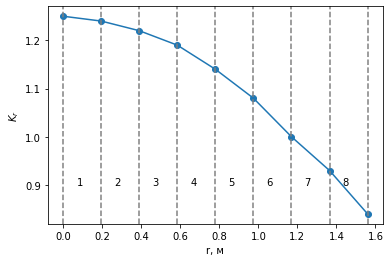

In [99]:
import matplotlib.pyplot as pl
from coursache import print_latex
import numpy as np
from pathlib import Path
# from scipy.special import j0

R_az = 1.56
delta_eff = 10 * 10 ** -2

def split_r_by_n(r, n) -> np.ndarray:
    return np.array([ (r / n) * i for i in range(n+1) ])


grid = split_r_by_n(R_az, 8)

# def K_z_ref(r):
    # return - r ** 2 + 1.25
 #    return j0(2.4048 / (R_az + delta_eff) * r) + 0.25

def Podgon(r): 
    return - 0.17369 * r ** 2 + 1.25



# ref_plot = (grid) , # K_z_ref(grid))

# K_zs = (lambda r: - r ** 2 + 1)(grid) # np.array([1, 0.9, 0.8, 0.6, 0.5, 0.3, 0.25, 0.2, 0.1 ])

K_zs = [1.25, 1.248, 1.22, 1.17 , 1.1,
       1.02, 0.95, 0.88, 0.8]

K_rs = np.round(Podgon(grid), decimals=2)
K_rs = np.array([1.25, 1.24, 1.22, 1.19, 1.14, 1.08, 1, 0.93, 0.84])
print(repr(K_zs))
# K_zs = K_z_ref(grid)

Tvses = np.array([0, 1, 6, 12, 18, 24, 30, 36, 36])

Tvses_total = sum(K_zs[i] * Tvses[i] for i in range(8 + 1))
print_latex(fr"$\sum K_r^iN^i={Tvses_total}$")

K_r_podgon = (grid, K_rs)


# pl.plot(*ref_plot)
# pl.scatter(*ref_plot)

pl.scatter(*K_r_podgon)
pl.plot(*K_r_podgon)

for n, i in enumerate(grid, start=1):
    pl.axvline(i, linestyle='--', color="gray")
    if n <= 8:
        pl.text(i + R_az / 8 / 2 - 0.03, 0.9, f"{n}")
pl.xlabel('r, м')
pl.ylabel('$K_r$')
K_rs = K_rs[1:]
save = input("press f to save"); pl.savefig("fig/Kr.png", dpi=1000) if save == "f" else print("not saved")

In [100]:
grid

array([0.   , 0.195, 0.39 , 0.585, 0.78 , 0.975, 1.17 , 1.365, 1.56 ])

### Подготовка $K_z$

In [101]:
from math import pi as π
from math import cos
H_az = 3.5
Q_az = 2.904 * 10 ** 3 * 10 ** 6
split = 30
grid_z = [- H_az / 2 + H_az / split / 2 * (2 * n + 1) for n in range(30)]

def Kz(z):
    Kz = 1.5
    Heff = 3.715
    return Kz * cos (π * z / Heff)

K_zs = np.array(list(map(Kz, grid_z)))

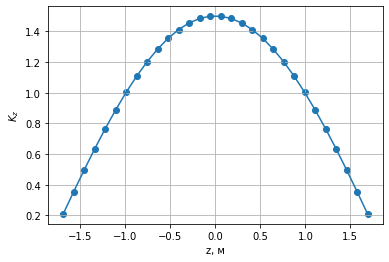

In [102]:
pl.plot(grid_z, K_zs)
pl.scatter(grid_z, K_zs)
pl.xlabel("z, м")
pl.ylabel("$K_z$")
pl.grid()
save = input("press f to save"); pl.savefig("fig/Kz.png", dpi=1000) if save == "f" else print("not saved")


Определим генерацию файла с тепловыделениями `Q6.txt`

In [103]:
import pandas as pd

#Q_txt = pd.read_csv("tools/TRETON/Q6.txt", sep=r"\s+", header=None)
#Q_txt.head()

r_split = [
    [82],  # 1 белый
    [68, 69, 83, 96, 95, 81],  # 2 фиолетовый
    [54, 55, 56, 70, 84, 97, 110, 109, 108, 94, 80, 67],
    [41, 42, 43, 44, 57, 71, 85, 98, 111, 123, 122, 121, 120, 107, 93, 79, 66, 53],
    [29, 30, 31, 32, 33, 45, 58, 72, 86, 99, 112, 124, 135, 134, 133, 132, 131, 119, 106, 92, 78, 65, 52, 40],
    [18, 19, 20, 21, 22, 23, 34, 46, 59, 73, 87, 100, 113, 125, 136, 146, 145, 144, 143, 142, 141, 130, 118, 105, 91, 77, 64, 51, 39, 28],
    [8, 9, 10, 11, 12, 13, 14, 24, 35, 47, 60, 74, 88, 101, 114, 126, 137, 147, 156, 155, 154, 153, 152, 151, 150, 140, 129, 117, 104, 90, 76, 63, 50, 38, 27, 17],
    [1, 2, 3, 4, 5, 6, 15, 25, 36, 48, 61, 75, 102, 115, 127, 138, 148, 157, 163, 162, 161, 160, 159, 158, 149, 139, 128, 116, 103, 89, 62, 49, 37, 26, 16, 7]
]

def Q_by_r(N=1, save=False, file: str | Path ="Q_my.txt"):
    Q_my = pd.DataFrame(np.zeros((163, 30)))
    for i in range(8):
        for j in r_split[i]:
            Q_my.iloc[j - 1] = N * K_rs[i] * Q_az / 163 / split * K_zs
    if save:
        Q_my.round(3).to_csv(file, sep= ' ', header=None, index=False)
    return Q_my

In [145]:
Q_nominal.round(3).to_csv("wow.txt", sep= ' ', header=None, index=False)

Определим генерацию температур `T_IN.txt`

In [105]:
from itertools import chain

T_low = 284
T_normal = 287
az_quarts = {
    'I': [1, 2, 3, 7, 8, 9, 10, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 31, 37, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 55, 62, 63, 64, 65, 66, 67, 68, 77, 79],
    'II': [4, 5, 6, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 32, 33, 34, 35, 36, 43, 44, 45, 46, 47, 48, 56, 57, 58, 59, 60, 61, 69, 70, 71, 72, 73, 74, 75, 83, 85, 87, 88],
    'III': [76, 78, 80, 81, 89, 90, 91, 92, 93, 94, 95, 103, 104, 105, 106, 107, 108, 116, 117, 118, 119, 120, 121, 128, 129, 130, 131, 132, 139, 140, 141, 142, 143, 149, 150, 151, 152, 158, 159, 160],
    'IV': [84, 86, 96, 97, 98, 99, 100, 101, 102, 109, 110, 111, 112, 113, 114, 115, 122, 123, 124, 125, 126, 127, 133, 134, 135, 136, 137, 138, 144, 145, 146, 147, 148, 153, 154, 155, 156, 157, 161, 162, 163]
}
DISABLED_QUARTS = 'I', 'IV'
disabled_cells_i = set(chain.from_iterable(az_quarts[q] for q in DISABLED_QUARTS))


def T_for_quarts(disabled_quarts=[], save=False, file: str | Path ="T_IN.txt", t_low=T_low, t_normal=T_normal):
    DISABLED_QUARTS = disabled_quarts
    disabled_cells_i = set(chain.from_iterable(az_quarts[q] for q in DISABLED_QUARTS))
    Ts = pd.Series(np.full((163,), t_normal))
    for i in range(163):
        if i + 1 in disabled_cells_i:
            Ts[i] = t_low
    if save:
        Ts.to_csv(file, sep=" ", index=False, header=False)
    return Ts


### Номинальная мощность

**Запускаем третон руками**

In [137]:
TRETON_NOMINAL_FOLDER = Path("tools/TRETON-nominal")
COMMON_T_R_PLOT_ARGS = dict(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)

In [106]:
Q_nominal

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
1,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
2,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
3,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
4,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
159,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
160,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942
161,104591.584942,177063.460266,247813.259509,316152.887359,381417.689244,442972.915598,500219.895287,552601.85813,599609.349919,640785.187238,...,640785.187238,599609.349919,552601.85813,500219.895287,442972.915598,381417.689244,316152.887359,247813.259509,177063.460266,104591.584942


In [140]:
Q_nominal = Q_by_r(N=1, save=True, file=TRETON_NOMINAL_FOLDER / "Q6.txt")
T_IN_nominal = T_for_quarts(save=True, file=TRETON_NOMINAL_FOLDER / "T_IN.txt")

**Графики**

Температура теплоносителя в кассете с максимальной температурой по высоте

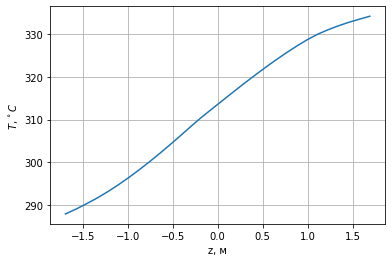

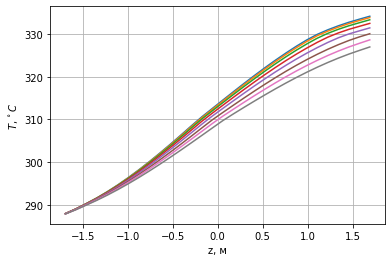

In [130]:
T_teplonos_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_tepl.dat", 
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_teplonos_nominal.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)
pl.show()
for r in range(8):
   T_teplonos_nominal.iloc[np.array(r_split[r]) - 1].mean().plot(label=r"{r} зона", **COMMON_T_R_PLOT_ARGS)

Температура топлива в кассете с максимальной температурой по высоте

<AxesSubplot:xlabel='z, м', ylabel='$T, ^\\circ C$'>

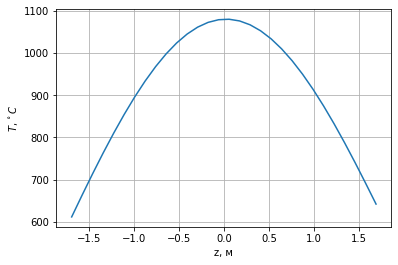

In [109]:
T_fuel_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_fuel.dat", 
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_fuel_nominal.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)

<AxesSubplot:xlabel='z, м', ylabel='$T, ^\\circ C$'>

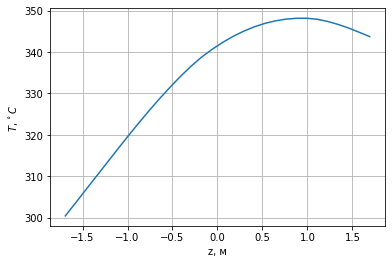

In [110]:
T_obl_naruj_nominal = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_r_obl_naruj.dat",
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_obl_naruj_nominal.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)

<AxesSubplot:xlabel='z, м', ylabel='$T, ^\\circ C$'>

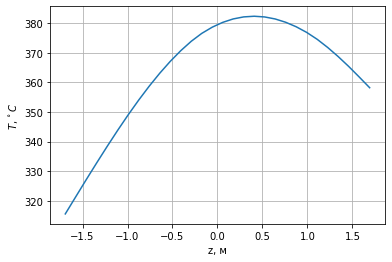

In [111]:
T_obl_naruj_vnutr = pd.read_csv(TRETON_NOMINAL_FOLDER / "t_r_obl_vnutr.dat",
                                 sep=r"\s+", header=None)\
                                    .loc[:, 2:].set_axis(grid_z, axis=1)
T_obl_naruj_vnutr.max().plot(xlabel=r"z, м", ylabel=r"$T, ^\circ C$", grid=True)

In [136]:
Rho_tepl = pd.read_csv(TRETON_NOMINAL_FOLDER / "ro_tepl.dat",
                       sep=r"\s+", header=None)
                                    #.loc[:, 2:].set_axis(grid_z, axis=1)
Rho_tepl

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.6025,1.4610,750.5216,748.8701,747.0332,744.6218,741.9906,739.1828,736.2215,733.1197,...,705.8832,701.6724,697.3676,693.1872,689.1429,685.2613,681.5494,678.0305,674.7073,671.5997
1,668.7059,666.0424,663.6020,661.4107,659.2972,-0.3615,1.4610,750.5214,748.8696,747.0324,...,723.1890,719.7407,716.2629,712.7705,709.2908,705.8690,701.6547,697.3496,693.1694,689.1261
2,685.2461,681.5368,678.0215,674.7026,671.6006,668.7128,666.0562,663.6225,661.4372,659.3281,...,739.1812,736.2194,733.1171,729.9001,726.5828,723.1930,719.7459,716.2696,712.7787,709.3007
3,705.8807,701.6706,697.3681,693.1904,689.1491,685.2706,681.5620,678.0463,674.7260,671.6211,...,750.5213,748.8695,747.0322,744.6204,741.9889,739.1809,736.2193,733.1174,729.9007,726.5841
4,723.1947,719.7482,716.2724,712.7820,709.3044,705.8844,701.6761,697.3733,693.1952,689.1536,...,663.6513,661.4631,659.3493,0.3615,1.4610,750.5211,748.8688,747.0311,744.6189,741.9869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,712.7852,709.3089,705.8904,701.6874,697.3864,693.2099,689.1697,685.2919,681.5836,678.0678,...,0.1205,-1.4610,750.5208,748.8679,747.0296,744.6168,741.9844,739.1755,736.2132,733.1106
190,729.8934,726.5764,723.1869,719.7400,716.2640,712.7734,709.2956,705.8755,701.6671,697.3637,...,668.7274,666.0689,663.6332,661.4453,659.3328,0.3615,-1.4610,750.5210,748.8687,747.0308
191,744.6182,741.9858,739.1766,736.2137,733.1103,729.8919,726.5735,723.1826,719.7342,716.2566,...,685.2436,681.5338,678.0174,674.6969,671.5924,668.7017,666.0418,663.6049,661.4169,659.3063
192,0.6025,-1.4610,750.5210,748.8685,747.0305,744.6183,741.9865,739.1783,736.2169,733.1152,...,705.8909,701.6889,697.3874,693.2102,689.1690,685.2902,681.5808,678.0642,674.7426,671.6362


In [ ]:
t_nominal = pd.read_csv("tools/TRETON-nominal/t_tepl.dat", sep=r"\s+", header=None)

# T_z_by_r = [nominal.iloc[np.array(r_split[i]) - 1].mean().values for i in range(8)]
# for i in range(8):
#     pl.plot(grid_z, T_z_by_r[i][1:-1], label=f"{i+1} radius")
# pl.legend()
# t_nominal.iloc[:, 1:]
T_z_by_r = [t_nominal.iloc[np.array(r_split[i]) - 1, 1:].mean().values for i in range(8)]
for i in range(8):
    pl.plot(T_z_by_r[i][1:-1], grid_z[1:], label=f"{i+1} radius")

In [ ]:
# pl.plot([R_az / 8 / 2 * (2 * n ) for n in range(8)], list(map(np.mean, Q_z_by_r)))
pl.bar([R_az / 8 / 2 * (2 * n ) + R_az / 8 / 2 for n in range(8)], list(map(np.mean, Q_z_by_r)), width=R_az / 8)
for i in grid:
    pl.axvline(i, linestyle='--', color="gray")
pl.xlabel("r, м")
pl.ylabel("Q, Вт")

### Повышенная мощность
**Запускаем третон руками**

In [96]:
TRETON_POVISH_FOLDER = Path("tools/TRETON-povish")

In [97]:
Q_povish = Q_by_r(N=1.15, save=True, file=TRETON_POVISH_FOLDER / "Q6.txt")
T_IN_povish = T_for_quarts(save=True, file=TRETON_POVISH_FOLDER / "T_IN.txt")

**Графики**

### 3 ГЦН
**Запускаем третон руками**

In [93]:
TRETON_ONE_GCN_FOLDER = Path("tools/TRETON-one-gcn/")

Q_one_gcn = Q_by_r(N=0.75, save=True, file=TRETON_ONE_GCN_FOLDER / "Q6.txt")
T_IN_one_gcn = T_for_quarts(disabled_quarts=['I'], save=True, file=TRETON_ONE_GCN_FOLDER / "T_IN.txt")

**Графики**

### 2 ГЦН
**Запускаем третон руками**


In [94]:
TRETON_TWO_GCN_FOLDER = Path("tools/TRETON-two-gcn/")

Q_two_gcn = Q_by_r(N=0.5, save=True, file=TRETON_TWO_GCN_FOLDER / "Q6.txt")
T_IN_two_gcn = T_for_quarts(disabled_quarts=['I', 'IV'], save=True, file=TRETON_TWO_GCN_FOLDER / "T_IN.txt")

**Графики**